### Controlling Overfitting using Regularized Regression 

### Part 1 - Learning how to Fit Regularized Regression Model

In [1]:
#The required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Data Hitters (same data we used in our ML class)
hit = pd.read_csv("Hitters.csv")
hit.head()

### Preparing the Data for Model Building

In [ ]:
#Variables
hit.columns

In [ ]:
#Let us drop the column 'Unnamed'
#hit = hit.drop(columns = 'Unnamed: 0')
hit.head()

In [ ]:
#Missing values?
hit.isnull().sum()

In [ ]:
#The target variable 'Salary' contains some missing values.
#Let us drop the rows containng these missing values



In [ ]:
#Creating Dummy variables for the nominal variables ['League', 'Division', 'NewLeague']



In [ ]:
#Let us drop the original nominal variables from hit2 add these dummy variables to it (at the same time let us also remove the Target variable Salary)
#Step 1 - dropping



In [ ]:
#Step 2 - Concatinating



In [ ]:
#Separating out the predictors (X) and the target (y)



In [ ]:
#Train-Test Split



In [ ]:
#Dimension checks



### A. Fitting a Ridge Regression Model

In [2]:
#Libraries for Model fitting and Validation

from sklearn.preprocessing import scale                           #For scaling the data
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV   #For fitting regularized models and cross validation algo.
from sklearn.metrics import mean_squared_error                    #For validation


In [ ]:
#Fitting a ridge regression for a particular value of alpha





In [ ]:
#Fitting a ridge regression for a particular value of alpha





In [ ]:
# Use a ridge regression model to predict the test data




In [ ]:
#FOR MANY ALPHAS...



In [ ]:
#Fitting a Ridge Regression Model for each alpha




In [ ]:
#identifying the Best alpha (a.k.a. lambda)



In [ ]:
#MSE for the chosen alpha




In [ ]:
#Fit the model on the entire data



In [ ]:
#Study the Ridge() function - It works somewhat differently from what we do in R

Ridge    #Press shift + Tab (3 times)

### B. Fitting a LASSO Model

### Part 2 - Controlling overfitting using Regularized Regression

For the next section you will be using the housing data that you have used in the previous session

#### 1. Create a basic setup

Write your own function called ‘polynomial_dataframe’ which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’. (You may copy and paste the polynomial_dataframe() function created in the previous day)

In [3]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    #...
    
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            #...
            
            poly_dataframe[name] = feature**power
            
            
    return poly_dataframe



In [4]:
house_set1 = pd.read_csv('C:\\Users\\SKR\\Desktop\\Model Interpretation\\house train\\wk3_kc_house_set_1_data.csv')
house_set2 = pd.read_csv('C:\\Users\\SKR\\Desktop\\Model Interpretation\\house train\\wk3_kc_house_set_2_data.csv')
house_set3 = pd.read_csv('C:\\Users\\SKR\\Desktop\\Model Interpretation\\house train\\wk3_kc_house_set_3_data.csv')
house_set4 = pd.read_csv('C:\\Users\\SKR\\Desktop\\Model Interpretation\\house train\\wk3_kc_house_set_4_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')
validation = pd.read_csv("wk3_kc_house_valid_data.csv")


In [5]:
# sorting the values
house_set1 = house_set1.sort_values('sqft_living')
house_set2 = house_set2.sort_values('sqft_living')
house_set3 = house_set3.sort_values('sqft_living')
house_set4 = house_set4.sort_values('sqft_living')
test = test.sort_values('sqft_living')
validation = validation.sort_values('sqft_living')

In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =1.5e-5,normalize = True)
import matplotlib.pyplot as plt

#### 2. Fitting a Polynomial L2 Regularised Regression Model of Order 15

Generate polynomial features up to degree 15 using `polynomial_dataframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5. Plot the model on the scatter plot



In [7]:
l2_small_penalty = 1.5e-5

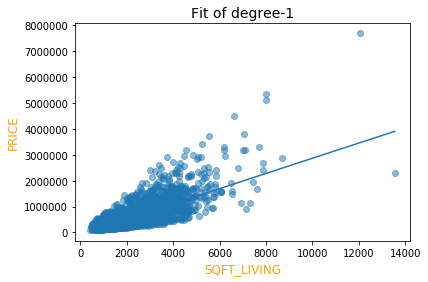

[293.61318695]


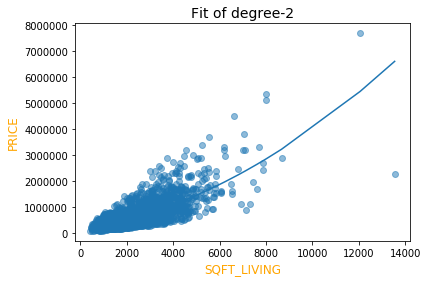

[1.44314559e+02 2.48187379e-02]


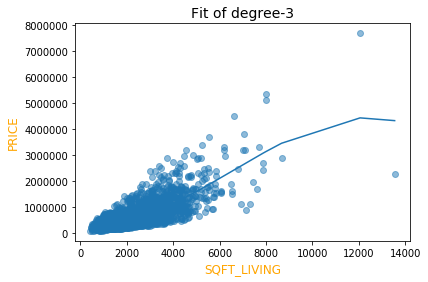

[-1.1948964e+02  9.8812360e-02 -5.0442409e-06]


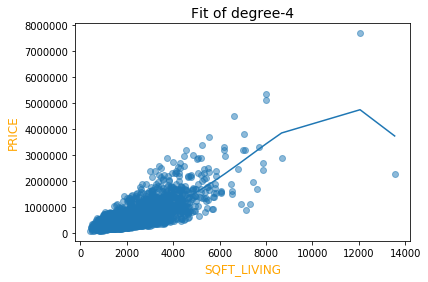

[ 1.10827436e+02 -5.38186773e-04  1.01555097e-05 -6.86243129e-10]


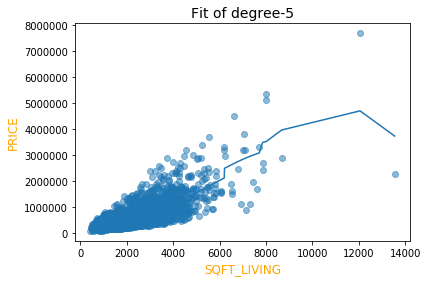

[ 6.40464648e+01  1.96138695e-02  7.54364853e-06 -5.89055144e-10
 -1.98582386e-14]


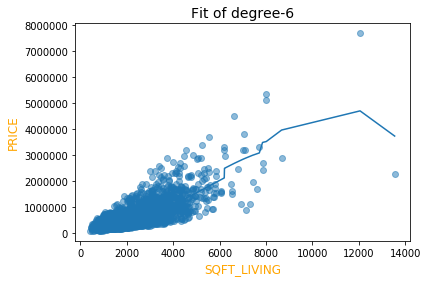

[ 6.49871854e+01  1.93112661e-02  7.57982649e-06 -5.90438405e-10
 -1.98637097e-14  1.58723443e-16]


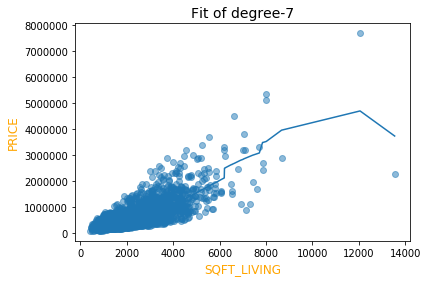

[ 6.29542739e+01  2.01049063e-02  7.47910853e-06 -5.86654169e-10
 -1.99864126e-14  1.85163962e-16 -5.08872344e-16]


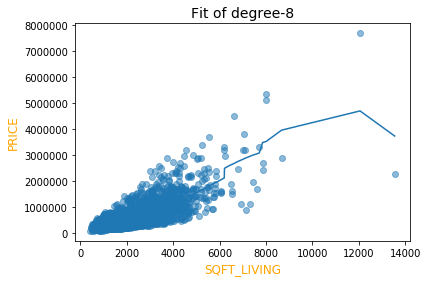

[ 6.23224772e+01  2.03275044e-02  7.45194457e-06 -5.85606634e-10
 -1.98779748e-14  1.62088958e-16 -5.17830665e-16  3.31515895e-16]


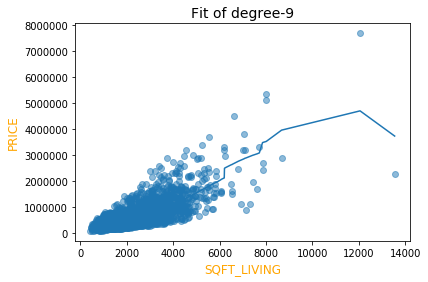

[ 6.22675041e+01  2.03337567e-02  7.44955245e-06 -5.85376390e-10
 -1.98514099e-14  1.82525321e-16 -4.82253122e-16  2.94105924e-16
 -3.85300755e-16]


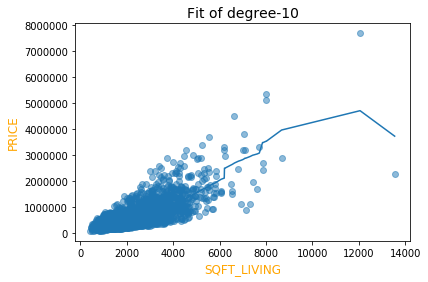

[ 5.95317163e+01  2.11439939e-02  7.36736513e-06 -5.82835834e-10
 -1.97894693e-14  2.25181087e-16 -6.32596198e-16  3.14456985e-16
 -2.43114008e-16 -1.17042147e-15]


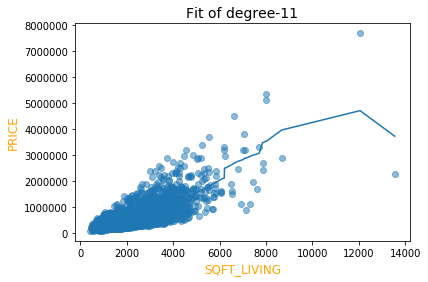

[ 6.15037084e+01  2.04279758e-02  7.45790243e-06 -5.86385696e-10
 -1.97435907e-14  2.15853317e-16 -6.48754743e-16  3.26318963e-16
 -2.49192963e-16 -1.18577763e-15  2.40873041e-16]


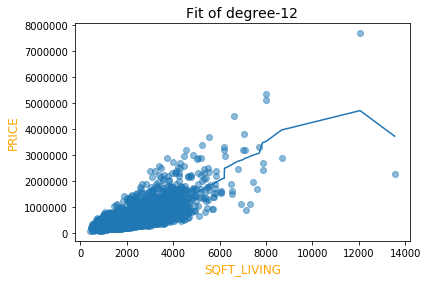

[ 5.98955607e+01  2.10918561e-02  7.36211043e-06 -5.82258159e-10
 -1.98113074e-14  2.05315688e-16 -6.75666803e-16  2.67057225e-16
 -2.40410227e-16 -1.23074867e-15  2.62341129e-16  4.84606146e-16]


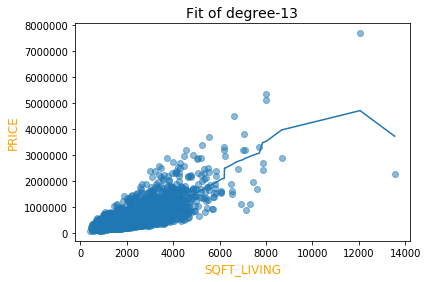

[ 6.01935779e+01  2.10163196e-02  7.36896278e-06 -5.82506360e-10
 -1.98515469e-14  2.24490642e-16 -6.75866694e-16  2.70691820e-16
 -2.34486160e-16 -1.21290262e-15  2.58542335e-16  4.99120591e-16
  2.10366344e-16]


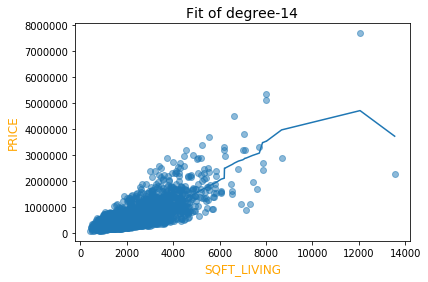

[ 6.01504076e+01  2.09881160e-02  7.37386814e-06 -5.82626808e-10
 -1.98146637e-14  2.04278578e-16 -6.82035796e-16  2.65677528e-16
 -2.18733334e-16 -1.23930119e-15  2.33639409e-16  5.14545941e-16
  2.29206506e-16 -3.08295728e-16]


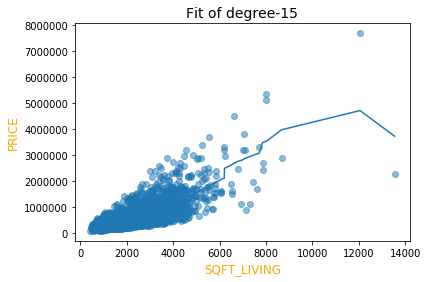

[ 5.90496495e+01  2.12448422e-02  7.35442703e-06 -5.82213622e-10
 -1.97771209e-14  1.83836710e-16 -6.65378962e-16  2.80056871e-16
 -1.80864494e-16 -1.24485588e-15  2.25625983e-16  5.09136803e-16
  2.25231838e-16 -3.14105526e-16 -3.33563636e-16]


In [15]:
for i in range(1,16,1):
    feature = polynomial_dataframe(house_set1.sqft_living,i)
    x = feature
    y = house_set1.price
    reg = ridge.fit(x,y)
    plt.scatter(house_set1.sqft_living,y, alpha =.5)
    plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
    plt.ylabel('PRICE', color = "orange", fontsize= 12 )
    plt.title('Fit of degree-'+str(i),fontsize= 14)
    plt.plot(house_set1.sqft_living, reg.predict(x))
    plt.show()
    print(reg.coef_)

### 3. Observe Overfitting

Recall from the last exercise that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. 


In this exercise you will reproduce the same experiment you did in the last class, except this time use a Ridge Regression model instead of OLS regression.




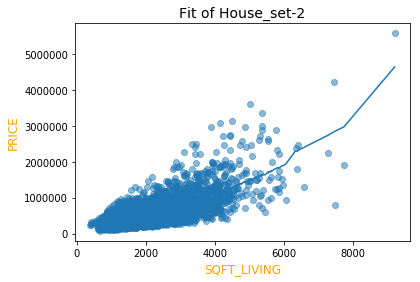

[-1.97541748e+02  1.57556183e-01 -2.04902559e-05  1.19913940e-09
 -1.30430118e-14  7.60701202e-16 -4.79683304e-16 -2.94497048e-16
 -6.15936148e-16  3.79130220e-16  5.29804345e-16  8.87739967e-16
  1.07148562e-15 -4.40614838e-16  1.39422388e-15]


In [11]:
feature = polynomial_dataframe(house_set2.sqft_living ,15)
x =feature
y = house_set2.price
reg = ridge.fit(x,y)
plt.scatter(house_set2.sqft_living,y, alpha =.5)
plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
plt.ylabel('PRICE', color = "orange", fontsize= 12 )
plt.title('Fit of House_set-2',fontsize= 14)
plt.plot(house_set2.sqft_living, reg.predict(x))
plt.show()
print(reg.coef_)

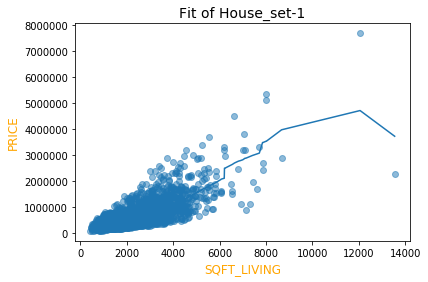

[ 5.90496495e+01  2.12448422e-02  7.35442703e-06 -5.82213622e-10
 -1.97771209e-14  1.83836710e-16 -6.65378962e-16  2.80056871e-16
 -1.80864494e-16 -1.24485588e-15  2.25625983e-16  5.09136803e-16
  2.25231838e-16 -3.14105526e-16 -3.33563636e-16]


In [12]:
feature = polynomial_dataframe(house_set1.sqft_living ,15)
x =feature
y = house_set1.price
reg = ridge.fit(x,y)
plt.scatter(house_set1.sqft_living,y, alpha =.5)
plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
plt.ylabel('PRICE', color = "orange", fontsize= 12 )
plt.title('Fit of House_set-1',fontsize= 14)
plt.plot(house_set1.sqft_living, reg.predict(x))
plt.show()
print(reg.coef_)

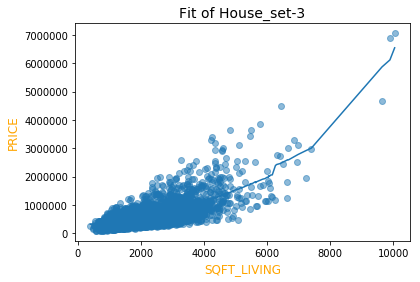

[-1.80028676e+02  1.48554220e-01 -1.88248463e-05  1.17512943e-09
 -1.58063412e-14 -2.64245919e-16 -4.49108532e-16  5.95157950e-16
  4.29070480e-16  5.26414248e-16 -4.58268208e-16  1.19420640e-15
  6.20370718e-16  3.60807025e-16 -3.00588142e-16]


In [13]:
feature = polynomial_dataframe(house_set3.sqft_living ,15)
x =feature
y = house_set3.price
reg = ridge.fit(x,y)
plt.scatter(house_set3.sqft_living,y, alpha =.5)
plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
plt.ylabel('PRICE', color = "orange", fontsize= 12 )
plt.title('Fit of House_set-3',fontsize= 14)
plt.plot(house_set3.sqft_living, reg.predict(x))
plt.show()
print(reg.coef_)

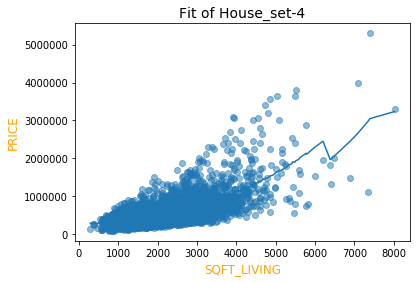

[-2.46616919e+01  6.77057293e-02 -4.08593583e-06  2.52149415e-10
  3.52906294e-14 -1.23558114e-15 -4.10669947e-16  8.97942337e-16
 -4.97106825e-16 -5.38742047e-16  2.54917344e-16  4.01696496e-16
  2.99759802e-16 -1.03544124e-15 -3.22853089e-16]


In [14]:
feature = polynomial_dataframe(house_set4.sqft_living ,15)
x =feature
y = house_set4.price
reg = ridge.fit(x,y)
plt.scatter(house_set4.sqft_living,y, alpha =.5)
plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
plt.ylabel('PRICE', color = "orange", fontsize= 12 )
plt.title('Fit of House_set-4',fontsize= 14)
plt.plot(house_set4.sqft_living, reg.predict(x))
plt.show()
print(reg.coef_)

#### 3a. Fit a polynomial of degree 2 (Use L2 Penalty) 

Fit a polynomial regression of order 2. Plot the model on the scatter plot. (Use the l2_small_penalty)

#### 3b. Fit higher order polynomial fits (Use L2 Penalty)

Fit a polynomial of 3rd degree, 4th degree and 5th degree. Look at the fitted line. Do they appear as you would expect? (Use the l2_small_penalty)

#### 3c. Fit a polynomial of order 15 (Use L2 Penalty)

Now try a 15th degree polynomial (Use the L2_small_penalty). Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

#### 3d. Explore Overfitting due to High Variance (Due to less penalization)
Estimate a 15th degree polynomial on all 4 subsets of the original sample (provided to you), plot the results and view the coefficients for all four models.

What do you observe? Validate your understanding based on the output you got.

### 4. Penalizing the Coefficient to Prevent Overfitting

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)




In [16]:
l2_large_penalty=1.23e2

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =1.23e2,normalize = True)
import matplotlib.pyplot as plt

#### 4a. Repeat steps 3a and 3b (Using large L2 penalty)

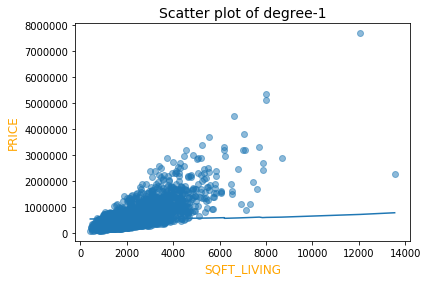

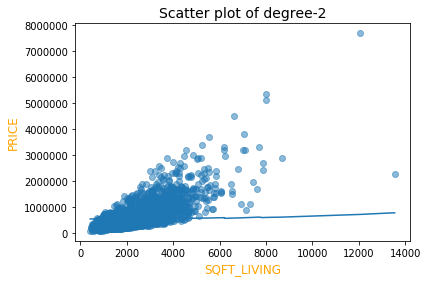

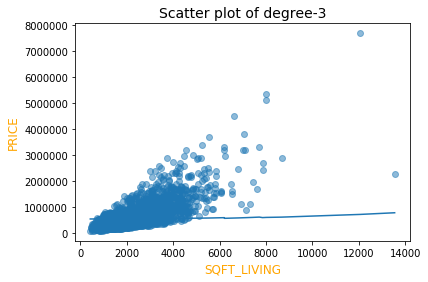

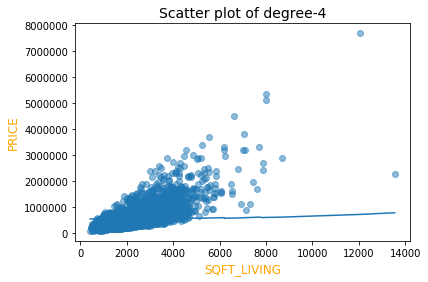

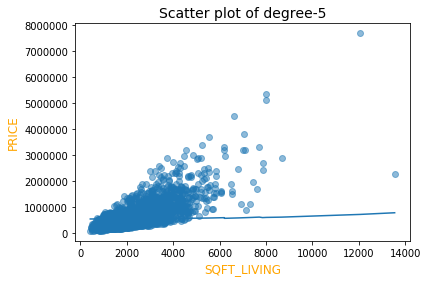

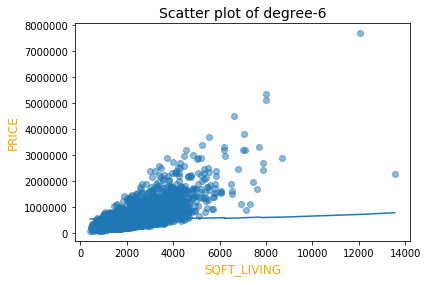

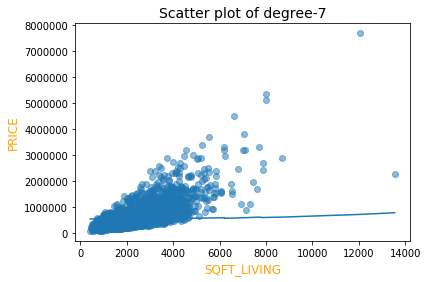

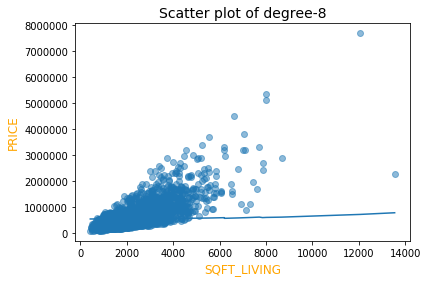

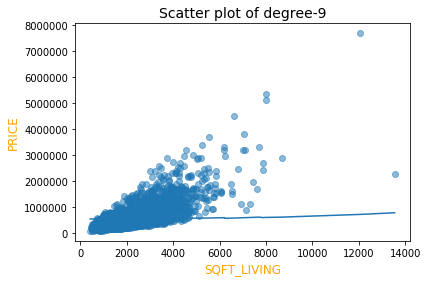

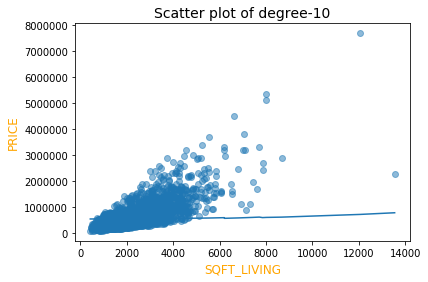

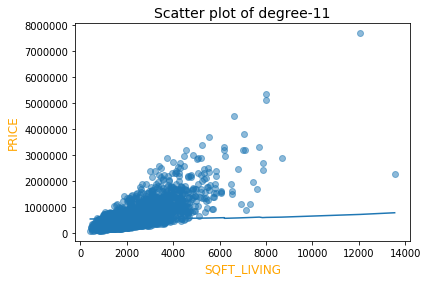

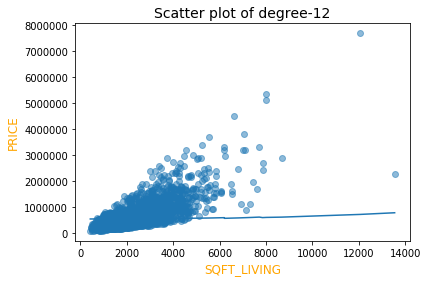

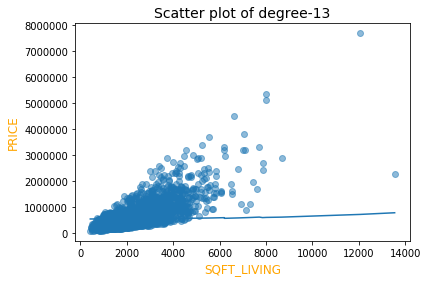

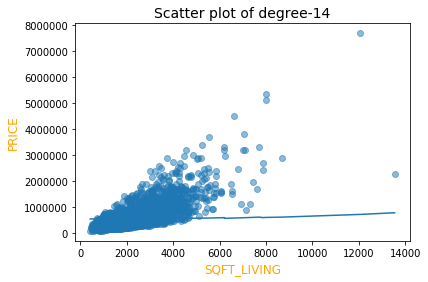

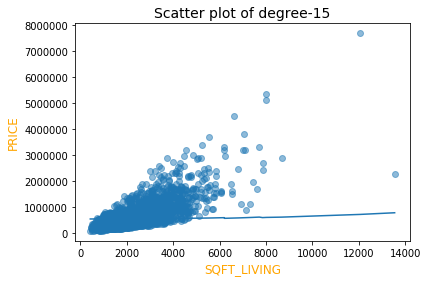

In [18]:
for i in range(1,16,1):
    feature = polynomial_dataframe(house_set1.sqft_living,15)
    x = feature
    y = house_set1.price
    reg = ridge.fit(x,y)
    plt.scatter(house_set1.sqft_living,y, alpha =.5)
    plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
    plt.ylabel('PRICE', color = "orange", fontsize= 12 )
    plt.title('Scatter plot of degree-'+str(i),fontsize= 14)
    plt.plot(house_set1.sqft_living, reg.predict(x))
    plt.show()

#### 4b. Fit a polynomial of order 15 (Using large L2 penalty)

#### 4c. Overfitting or Not?

Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty. These curves should vary a lot less, now that you introduced regularization.

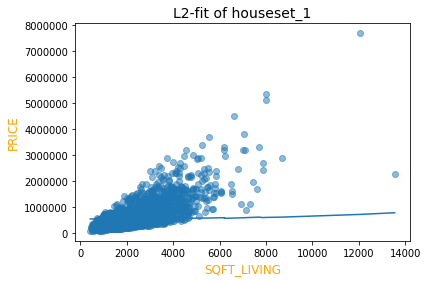

In [23]:
feature = polynomial_dataframe(house_set1.sqft_living ,15)
x =feature
y = house_set1.price
reg = ridge.fit(x,y)
plt.scatter(house_set1.sqft_living,y, alpha =.5)
plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
plt.ylabel('PRICE', color = "orange", fontsize= 12 )
plt.title('L2-fit of houseset_1',fontsize= 14)
plt.plot(house_set1.sqft_living, reg.predict(x))
plt.show()
    

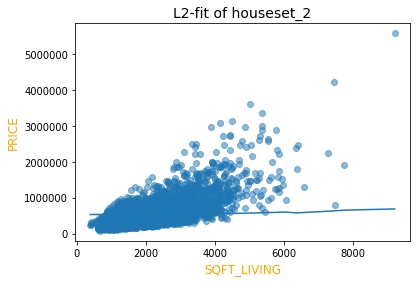

In [24]:
feature = polynomial_dataframe(house_set2.sqft_living ,15)
x =feature
y = house_set2.price
reg = ridge.fit(x,y)
plt.scatter(house_set2.sqft_living,y, alpha =.5)
plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
plt.ylabel('PRICE', color = "orange", fontsize= 12 )
plt.title('L2-fit of houseset_2',fontsize= 14)
plt.plot(house_set2.sqft_living, reg.predict(x))
plt.show()

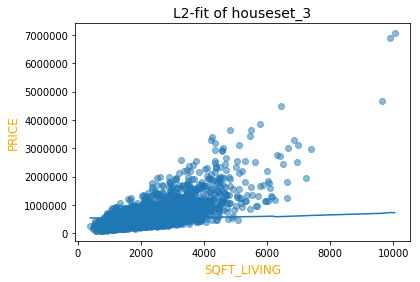

In [25]:
feature = polynomial_dataframe(house_set3.sqft_living ,15)
x =feature
y = house_set3.price
reg = ridge.fit(x,y)
plt.scatter(house_set3.sqft_living,y, alpha =.5)
plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
plt.ylabel('PRICE', color = "orange", fontsize= 12 )
plt.title('L2-fit of houseset_3',fontsize= 14)
plt.plot(house_set3.sqft_living, reg.predict(x))
plt.show()

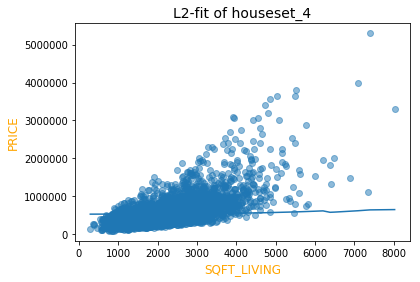

In [26]:
feature = polynomial_dataframe(house_set4.sqft_living ,15)
x =feature
y = house_set4.price
reg = ridge.fit(x,y)
plt.scatter(house_set4.sqft_living,y, alpha =.5)
plt.xlabel('SQFT_LIVING', color = "orange", fontsize= 12 )
plt.ylabel('PRICE', color = "orange", fontsize= 12 )
plt.title('L2-fit of houseset_4',fontsize= 14)
plt.plot(house_set4.sqft_living, reg.predict(x))
plt.show()

#### 4d. Controlling overfitting

Select the best alpha value for the 15th-order polynomial model. Re-fit the model on the data. Print the estimated coefficients and plot the model on the scatter plot

In [35]:
alphas = range(1,50,1)
ridge = Ridge(alpha =alphas,normalize = True)

In [36]:
test = pd.read_csv('wk3_kc_house_test_data.csv')
test.head()
x_test = test.sqft_living
x_test = polynomial_dataframe(x_test ,15)
y_test = test.price

MSE- [65114300011.70049, 69692033998.85657, 74323316186.75728, 78586217709.43423, 82381371007.96219, 85723988329.69193, 88663461726.39113, 91254682785.96008, 93548388565.0761, 95588529338.03023, 97412182073.01021, 99050303393.98021, 100528671420.5456, 101868779466.23979, 103088608163.723, 104203265957.29346, 105225510517.67395, 106166169788.02966, 107034481163.51126, 107838364942.93968, 108584645379.51057, 109279230044.36472, 109927256002.11073, 110533209499.79073, 111101024443.69333, 111634163818.17995, 112135687325.86409, 112608307846.35493, 113054438778.51405, 113476233914.95218, 113875621171.01031, 114254331233.43787, 114613921990.81027, 114955799446.45189, 115281235686.05193, 115591384369.20273, 115887294131.28448, 116169920215.2396, 116440134598.52641, 116698734836.35414, 116946451806.16093, 117183956508.62547, 117411866056.04634, 117630748958.69148, 117841129802.92236, 118043493400.90181, 118238288479.99403, 118425930970.1516, 118606806939.32637]
0
1


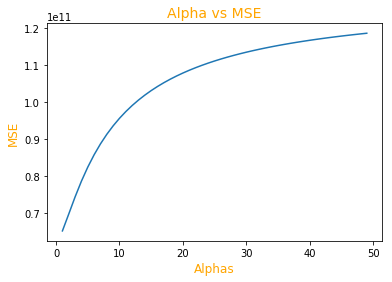

In [46]:
mse = []
for i in alphas:
    ridge4 = Ridge(alpha = i, normalize = True)
    ridge4.fit(x, y)
    mse.append(mean_squared_error(y_test, ridge4.predict(x_test)))
plt.plot(alphas,mse)
plt.xlabel('Alphas', color = "orange", fontsize= 12 )
plt.ylabel('MSE', color = "orange", fontsize= 12 )
plt.title('Alpha vs MSE',color = "orange",fontsize= 14)
print("MSE- "+str(mse))
print(mse.index(min(mse)))
print(alphas[mse.index(min(mse))])

# Best Alpha value for model with low mse is 1.5e-5

### 5. Selecting an L2 penalty via cross-validation

Repeat step 4 but this time using L2 Penalty.

In [30]:

alphas = np.arange(0.5,50,1000)
alphas

array([0.5])

In [42]:
feature = polynomial_dataframe(house_set4.sqft_living ,15)
x =feature
y = house_set4.price
ridgecv = RidgeCV(alphas = alphas, scoring = None , normalize = True)
ridgecv.fit(x, y)
ridgecv.coef_


array([ 6.19904757e+01,  1.10708231e-02,  1.82001794e-06,  2.38676359e-10,
        5.62155462e-14, -1.09255854e-15,  2.44811538e-17,  4.16244644e-16,
       -3.51165508e-16, -3.24538573e-16,  2.90322717e-16,  2.16212126e-17,
        2.95108134e-17, -6.68694485e-16, -6.11456840e-16])

In [32]:
ridgecv.alpha_

0.5

# Ridge Cross validation gives the same alpha value which has low MSE 

Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html